In [1]:
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## 1) Processing data on location of the countries

In [2]:
def transfo(a): 
    m = a.split(",")
    if len(m) == 1:
        return int(a)
    e = len(m[1])
    return int(m[0])+int(m[1])/10**e


In [3]:
L=[]
with open('Data_localisation/Urban.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';', quotechar='|')
    for row in (spamreader):
        l = [row[0]]
        for i in range(4,len(row)):
            if row[i] != '':
                l.append(transfo(row[i]))
        L.append(l)

In [4]:
L2 = [L[0]]
for i in range(len(L[1:])):
    if len(L[1:][i]) == 61:
        L2.append(L[1:][i])

In [5]:
df = pd.DataFrame(L2[1:],columns=L2[0][:-1])

In [6]:
def transpose(L):
    l = []
    for i in range(61):
        u = []
        for j in range(len(L)):
            u.append(L[j][i])
        l.append(u)
    return l


In [7]:
L1 = transpose(L2)

In [9]:
df1 = pd.DataFrame(L1[1:],columns=L1[0])

In [13]:
df1.to_csv("./cleaned_data/urbanization.csv")

## 1) Processing data on prices of the countries

# a) USA

In [14]:
V=[]
with open('US_price/Data_price.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';', quotechar='|')
    for row in (spamreader):
        V.append(row)

In [15]:
V1 = V[3:]

In [16]:
def transfo1(V):
    L=[]
    for i in range(len(V)):
        L.append([V[i][0],V[i][4]])
    return L


In [17]:
V2 = transfo1(V1)

In [18]:
def transfo2(V):
    s = 1990
    for i in range(len(V)):
        V[i][0] = s
        s+=1
        

In [19]:
transfo2(V2)

In [20]:
def transfo3(V):
    L = V[2:-1]
    for i in range(len(L)):
        L[i][1] = transfo(L[i][1])
    return L

In [21]:
V3 = transfo3(V2)

In [22]:
df2 = pd.DataFrame(V3,columns=['dates', 'prices_gas'])

In [24]:
df2.to_csv('./cleaned_data/us_gas_prices.csv')

In [25]:
df1['United States'][32:]

32    76.097
33    76.488
34    76.875
35    77.257
36    77.636
37    78.008
38    78.377
39    78.742
40    79.057
41    79.234
42    79.409
43    79.583
44    79.757
45    79.928
46    80.099
47    80.269
48    80.438
49    80.606
50    80.772
51    80.944
52    81.119
53    81.299
54    81.483
55    81.671
56    81.862
57    82.058
58    82.256
59    82.459
Name: United States, dtype: float64

In [26]:
df2['prices_gas'][:-1]

0     1.087
1     1.067
2     1.075
3     1.111
4     1.199
5     1.199
6     1.030
7     1.136
8     1.484
9     1.420
10    1.345
11    1.561
12    1.852
13    2.270
14    2.572
15    2.796
16    3.246
17    2.353
18    2.782
19    3.521
20    3.618
21    3.505
22    3.358
23    2.429
24    2.143
25    2.415
26    2.719
27    2.604
Name: prices_gas, dtype: float64

# b) France 

In [27]:
R=[]
with open('Fr_prices.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';', quotechar='|')
    for row in (spamreader):
        R.append(row)

In [28]:
def transfo4(x):
    s = 1
    t = 0
    for i in range(1,len(x)-1):
        if not(x[i]=='.'):
            t = s * int(x[i]) + t
            s = s/10
    return t

In [29]:
for x in R[3:]:
    x.pop()
    x[1] = transfo4(x[1])

In [30]:
R[3:]

[['"2021-01"', 1.31],
 ['"2020-12"', 1.27],
 ['"2020-11"', 1.22],
 ['"2020-10"', 1.21],
 ['"2020-09"', 1.22],
 ['"2020-08"', 1.25],
 ['"2020-07"', 1.25],
 ['"2020-06"', 1.22],
 ['"2020-05"', 1.1800000000000002],
 ['"2020-04"', 1.23],
 ['"2020-03"', 1.32],
 ['"2020-02"', 1.42],
 ['"2020-01"', 1.49],
 ['"2019-12"', 1.47],
 ['"2019-11"', 1.44],
 ['"2019-10"', 1.44],
 ['"2019-09"', 1.44],
 ['"2019-08"', 1.42],
 ['"2019-07"', 1.42],
 ['"2019-06"', 1.43],
 ['"2019-05"', 1.49],
 ['"2019-04"', 1.47],
 ['"2019-03"', 1.46],
 ['"2019-02"', 1.44],
 ['"2019-01"', 1.4],
 ['"2018-12"', 1.42],
 ['"2018-11"', 1.48],
 ['"2018-10"', 1.52],
 ['"2018-09"', 1.48],
 ['"2018-08"', 1.45],
 ['"2018-07"', 1.45],
 ['"2018-06"', 1.46],
 ['"2018-05"', 1.45],
 ['"2018-04"', 1.4],
 ['"2018-03"', 1.37],
 ['"2018-02"', 1.3800000000000001],
 ['"2018-01"', 1.3900000000000001],
 ['"2017-12"', 1.28],
 ['"2017-11"', 1.27],
 ['"2017-10"', 1.24],
 ['"2017-09"', 1.22],
 ['"2017-08"', 1.2],
 ['"2017-07"', 1.1700000000000002],
 

In [31]:
df_fr = pd.DataFrame(R[3:],columns=['dates', 'prices_gas'])

In [27]:
#df_fr['prices_gas'] = 3.78541*df_fr['prices_gas']

In [32]:
df_fr.to_csv('./cleaned_data/fr_gas_price.csv')

In [33]:
mean = []
i = 0
for x in (df_fr['prices_gas'][13:]):
    if i%12 == 0:
        mean.append(x)
    i+=1

In [34]:
mean.reverse()

In [35]:
l_ = []
s = 1992
for x in mean:
    l_.append([s,x])
    s+=1

In [36]:
df_fr1 = pd.DataFrame(l_,columns=['dates', 'prices_gas'])

In [37]:
df_fr1

,dates,prices_gas
0,1992,0.54
1,1993,0.59
2,1994,0.59
3,1995,0.60
4,1996,0.70
5,1997,0.68
6,1998,0.62
7,1999,0.78
8,2000,0.89
9,2001,0.75


In [38]:
df1['France'][32:]

32    74.401
33    74.572
34    74.743
35    74.912
36    75.082
37    75.250
38    75.417
39    75.614
40    75.871
41    76.127
42    76.380
43    76.632
44    76.883
45    77.130
46    77.377
47    77.621
48    77.868
49    78.117
50    78.369
51    78.622
52    78.878
53    79.135
54    79.394
55    79.655
56    79.917
57    80.180
58    80.444
59    80.709
Name: France, dtype: float64

# c) Canada

In [39]:
G=[]
with open('Can_prices.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in (spamreader):
        G.append(row)

In [40]:
G[6:-13]

[['Geography',
  'January 1990',
  'February 1990',
  'March 1990',
  'April 1990',
  'May 1990',
  'June 1990',
  'July 1990',
  'August 1990',
  'September 1990',
  'October 1990',
  'November 1990',
  'December 1990',
  'January 1991',
  'February 1991',
  'March 1991',
  'April 1991',
  'May 1991',
  'June 1991',
  'July 1991',
  'August 1991',
  'September 1991',
  'October 1991',
  'November 1991',
  'December 1991',
  'January 1992',
  'February 1992',
  'March 1992',
  'April 1992',
  'May 1992',
  'June 1992',
  'July 1992',
  'August 1992',
  'September 1992',
  'October 1992',
  'November 1992',
  'December 1992',
  'January 1993',
  'February 1993',
  'March 1993',
  'April 1993',
  'May 1993',
  'June 1993',
  'July 1993',
  'August 1993',
  'September 1993',
  'October 1993',
  'November 1993',
  'December 1993',
  'January 1994',
  'February 1994',
  'March 1994',
  'April 1994',
  'May 1994',
  'June 1994',
  'July 1994',
  'August 1994',
  'September 1994',
  'October 

In [41]:
K = []
for k in range(len(G[6])):
    M = []
    for i in range(6, len(G)-13):
        M.append(G[i][k])
    K.append(M)

In [42]:
def t1(K):
    I = []
    for i in range(len(K)):
        I.append(K[i][:1] + K[i][2:])
    return I

In [43]:
I = t1(K)

In [44]:
df_can = pd.DataFrame(I[1:], columns=['dates'] + I[0][1:])

In [45]:
df_can

,dates,"St. John's, Newfoundland and Labrador","Charlottetown and Summerside, Prince Edward Island","Halifax, Nova Scotia","Saint John, New Brunswick","QuÃ©bec, Quebec","MontrÃ©al, Quebec","Ottawa-Gatineau, Ontario part, Ontario/Quebec 2 (map)","Toronto, Ontario","Thunder Bay, Ontario 3 (map)","Winnipeg, Manitoba","Regina, Saskatchewan","Saskatoon, Saskatchewan","Edmonton, Alberta 4 (map)","Calgary, Alberta 4 (map)","Vancouver, British Columbia","Victoria, British Columbia","Whitehorse, Yukon","Yellowknife, Northwest Territories"
0,January 1990,57.7,54.6,..,..,58.3,59.0,56.0,48.5,56.4,51.8,51.0,55.2,48.3,47.9,57.6,55.0,57.0,58.9
1,February 1990,58.2,54.8,..,..,58.9,59.0,56.2,50.8,56.5,51.8,51.0,55.2,48.4,48.9,58.7,56.7,57.4,59.2
2,March 1990,58.5,55.0,..,..,59.5,59.7,56.3,53.1,56.5,52.8,54.9,55.2,48.9,49.7,58.7,56.7,57.6,59.6
3,April 1990,59.3,56.4,..,..,60.3,60.5,56.5,51.7,58.5,51.9,54.9,55.2,51.1,51.9,59.9,57.9,58.0,60.0
4,May 1990,59.8,56.8,..,..,60.4,60.7,56.5,53.9,58.4,53.2,54.9,55.2,52.9,51.9,59.9,58.5,57.9,60.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,September 2020,106.6,98.8,94.2,97.0,107.7,106.6,101.1,101.8,116.4,96.7,102.8,103.6,98.8,104.9,125.9,125.0,119.8,117.2
369,October 2020,110.3,99.6,94.1,96.8,101.1,105.4,100.1,100.7,116.0,101.1,97.8,102.0,92.0,104.5,122.3,121.6,119.9,120.0
370,November 2020,112.0,95.8,91.0,94.3,103.0,104.8,98.7,99.3,113.3,95.9,98.4,97.5,90.2,103.7,123.6,119.9,119.9,118.9
371,December 2020,117.0,101.5,96.5,98.8,107.2,108.7,103.2,103.6,114.6,95.7,99.8,100.0,94.7,101.9,126.1,120.3,119.9,118.9


In [46]:
J = []
for i in range(len(I[1:])):
    if i%12 == 0 :
        J.append(I[1:][i])

In [47]:
T = []
s= 1990
for j in range(len(J)):
    T.append([s+j, float(J[j][1])])
    

In [48]:
df_can_1 = pd.DataFrame(T[:-2], columns=['dates', 'prices'])

In [77]:
df_can_1.to_csv('./cleaned_data/ca_gas_prices.csv')

In [51]:
df1["Canada"][30:]

30    76.582
31    76.620
32    76.887
33    77.152
34    77.414
35    77.675
36    77.951
37    78.340
38    78.724
39    79.103
40    79.478
41    79.810
42    79.888
43    79.967
44    80.045
45    80.122
46    80.213
47    80.396
48    80.578
49    80.758
50    80.937
51    81.096
52    81.137
53    81.178
54    81.218
55    81.259
56    81.300
57    81.350
58    81.411
59    81.482
Name: Canada, dtype: float64

# d) The UK

In [52]:
L=[]
with open('UK_prices/prices.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';', quotechar='|')
    for row in (spamreader):
        L.append(row)

In [53]:
L[5:-8]

[['1954', 'January', '', '4,47', '4,90', '..', '..', '..', '..', '..', ''],
 ['1955', 'January', '', '4,49', '4,90', '..', '..', '4,38 ', '..', '..', ''],
 ['1956', 'January', '', '4,49', '5,04', '..', '..', '4,47 ', '..', '..', ''],
 ['1957', 'January', '', '6,09', '6,64', '..', '..', '6,07 ', '..', '..', ''],
 ['1958', 'January', '', '4,65', '5,13', '..', '..', '4,69 ', '..', '..', ''],
 ['1959', 'January', '', '4,67', '5,13', '..', '..', '4,70 ', '..', '..', ''],
 ['1960',
  'January',
  '',
  '4,67',
  '5,18',
  '..',
  '..',
  '4,79 ',
  '1,55 ',
  '1,55 ',
  ''],
 ['1961',
  'January',
  '',
  '4,58',
  '5,09',
  '..',
  '..',
  '4,65 ',
  '1,65 ',
  '1,52 ',
  ''],
 ['1962',
  'January',
  '',
  '4,86',
  '5,36',
  '..',
  '..',
  '4,93 ',
  '1,89 ',
  '1,73 ',
  ''],
 ['1963',
  'January',
  '',
  '4,77',
  '5,36',
  '..',
  '..',
  '4,93 ',
  '1,86 ',
  '1,73 ',
  ''],
 ['1964',
  'January',
  '',
  '4,77',
  '5,22',
  '..',
  '..',
  '4,97 ',
  '1,86 ',
  '1,73 ',
  ''],
 ['1

In [60]:
l = []
for x in L[5:-8]:
    l.append([int(x[0]), x[9]])
    

In [61]:
l

[[1954, '..'],
 [1955, '..'],
 [1956, '..'],
 [1957, '..'],
 [1958, '..'],
 [1959, '..'],
 [1960, '1,55 '],
 [1961, '1,52 '],
 [1962, '1,73 '],
 [1963, '1,73 '],
 [1964, '1,73 '],
 [1965, '1,73 '],
 [1966, '1,73 '],
 [1967, '1,73 '],
 [1968, '1,95 '],
 [1969, '1,95 '],
 [1970, '2,02 '],
 [1971, '2,14 '],
 [1972, '2,21 '],
 [1973, '2,27 '],
 [1974, '3,39 '],
 [1975, '5,26 '],
 [1976, '6,47 '],
 [1977, '7,93 '],
 [1978, '8,48 '],
 [1979, '8,36 '],
 [1980, '13,03 '],
 [1981, '15,80 '],
 [1982, '19,68 '],
 [1983, '22,52 '],
 [1984, '20,31 '],
 [1985, '22,62 '],
 [1986, '19,47 '],
 [1987, '14,70 '],
 [1988, '12,29 '],
 [1989, '11,15 '],
 [1990, '15,46 '],
 [1991, '17,13 '],
 [1992, '12,02 '],
 [1993, '13,52 '],
 [1994, '12,72 '],
 [1995, '13,93 '],
 [1996, '15,86 '],
 [1997, '18,14 '],
 [1998, '13,67 '],
 [1999, '11,36 '],
 [2000, '18,15 '],
 [2001, '20,46 '],
 [2002, '14,71 '],
 [2003, '18,63 '],
 [2004, '18,95 '],
 [2005, '23,99 '],
 [2006, '33,60 '],
 [2007, '34,03 '],
 [2008, '51,01 '],

In [62]:
def t2(n):
    m = n.split(",")
    s = int(m[0]) + int(m[1])/100
    return s

In [63]:
for x in l[6:]:
    x[1] = t2(x[1])

In [64]:
l[6:]

[[1960, 1.55],
 [1961, 1.52],
 [1962, 1.73],
 [1963, 1.73],
 [1964, 1.73],
 [1965, 1.73],
 [1966, 1.73],
 [1967, 1.73],
 [1968, 1.95],
 [1969, 1.95],
 [1970, 2.02],
 [1971, 2.14],
 [1972, 2.21],
 [1973, 2.27],
 [1974, 3.39],
 [1975, 5.26],
 [1976, 6.47],
 [1977, 7.93],
 [1978, 8.48],
 [1979, 8.36],
 [1980, 13.03],
 [1981, 15.8],
 [1982, 19.68],
 [1983, 22.52],
 [1984, 20.31],
 [1985, 22.62],
 [1986, 19.47],
 [1987, 14.7],
 [1988, 12.29],
 [1989, 11.15],
 [1990, 15.46],
 [1991, 17.13],
 [1992, 12.02],
 [1993, 13.52],
 [1994, 12.72],
 [1995, 13.93],
 [1996, 15.86],
 [1997, 18.14],
 [1998, 13.67],
 [1999, 11.36],
 [2000, 18.15],
 [2001, 20.46],
 [2002, 14.71],
 [2003, 18.63],
 [2004, 18.95],
 [2005, 23.99],
 [2006, 33.6],
 [2007, 34.03],
 [2008, 51.01],
 [2009, 43.83],
 [2010, 50.64],
 [2011, 61.9],
 [2012, 70.74],
 [2013, 68.99],
 [2014, 66.68],
 [2015, 46.33],
 [2016, 35.19],
 [2017, 51.99],
 [2018, 55.51],
 [2019, 56.72],
 [2020, 59.82],
 [2021, 49.85]]

In [65]:
df_uk = pd.DataFrame(l[6:], columns=['dates', 'prices'])

In [68]:
df_uk[:-2].to_csv('./cleaned_data/uk_gas_prices.csv')

In [67]:
df1["United Kingdom"]

0     78.444
1     78.374
2     78.237
3     78.099
4     77.960
5     77.821
6     77.682
7     77.541
8     77.400
9     77.259
10    77.117
11    77.030
12    77.195
13    77.358
14    77.521
15    77.683
16    77.844
17    78.005
18    78.164
19    78.323
20    78.481
21    78.588
22    78.539
23    78.489
24    78.440
25    78.390
26    78.340
27    78.290
28    78.240
29    78.190
30    78.140
31    78.112
32    78.172
33    78.232
34    78.293
35    78.353
36    78.413
37    78.472
38    78.532
39    78.591
40    78.651
41    78.751
42    79.047
43    79.339
44    79.629
45    79.915
46    80.199
47    80.479
48    80.757
49    81.031
50    81.302
51    81.570
52    81.837
53    82.102
54    82.365
55    82.626
56    82.886
57    83.143
58    83.398
59    83.652
Name: United Kingdom, dtype: float64

# e) South Africa 

# 3) Omitted variable GDP 

In [69]:
L=[]
with open('gdp2.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in (spamreader):
        L.append(row)

In [70]:
Country = []
GDP = [[] for k in range(len(L)-5)]
for k in range(5, len(L)):
    Country.append(L[k][0])
    for i in range(4, len(L[5])):
        GDP[k-5].append(L[k][i])

In [71]:
S=[]
s=1960
for k in range(len(GDP[0])):
    u =[s]
    s+=1
    for i in range(len(GDP)):
        if GDP[i][k] =='':
            u.append(None)
        else :
            u.append(float(GDP[i][k]))
    S.append(u)

In [72]:
df5 = pd.DataFrame(S,columns=['dates'] + Country)

In [73]:
for x in df5[32:-2]['United States']:
    print((x))

25418.9907763319
26387.2937338171
27694.853416234
28690.8757013347
29967.7127181749
31459.1389804773
32853.6769523009
34513.5615037271
36334.9087770589
37133.2428088526
38023.1611144021
39496.4858751381
41712.8010675545
44114.7477810544
46298.7314440927
47975.9676958038
48382.5584490552
47099.9804711343
48467.5157769259
49886.8181094923
51610.6052783379
53117.6678498178
55064.7445483427
56839.3817742317
57951.5840820997
60062.2223132211
62996.4712852605
65297.517508274


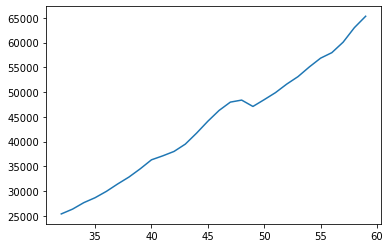

In [74]:
plt.plot( df5['United States'][32:-2])

In [76]:
df5.to_csv('./cleaned_data/gdp.csv')